In [2]:
import matplotlib.pyplot as plt
import pickle

In [3]:
config_results_pickle = "config_results-1575768336.803916.pickle"
file = open(config_results_pickle, 'rb')
config_results = pickle.load(file)
file.close()

In [4]:
base_results = list(filter(lambda x: x[0]["dataset"] == "base", config_results))
doc2vec_results = list(filter(lambda x: x[0]["dataset"] == "doc2vec", config_results))
basicname_results = list(filter(lambda x: x[0]["dataset"] == "basicname", config_results))

In [11]:
def get_best_results(results, n=5):
    r = sorted(results, key=lambda x: x[1]["accuracy"], reverse=True)
    return r[:n]

get_best_results(config_results, n=5)

[({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 20,
   'layer_sizes': (13, 13),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.5986428738497279,
   'accuracy': 0.6704262,
   'epoch_evaluations': {2: {'loss': 0.6119685340739397,
     'accuracy': 0.65677166},
    4: {'loss': 0.6097844083053394, 'accuracy': 0.66011006},
    6: {'loss': 0.6059164447875348, 'accuracy': 0.6607417},
    8: {'loss': 0.6050900301846093, 'accuracy': 0.6616139},
    10: {'loss': 0.6025279567200007, 'accuracy': 0.6648621},
    12: {'loss': 0.6024019032866439, 'accuracy': 0.66582453},
    14: {'loss': 0.6016019485800559, 'accuracy': 0.6663358},
    16: {'loss': 0.6028526572486455, 'accuracy': 0.6663659},
    18: {'loss': 0.6014514822967644, 'accuracy': 0.66741854},
    20: {'loss': 0.5986428738497279, 'accuracy': 0.6704262},
    21: {'loss': 0.5986428738497279, 'accuracy': 0.6704262}}}),
 ({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 20,
   'layer_sizes': (13, 13, 13),
   'dropout': None,

In [15]:
def plot_results(results, dataset, savename=None):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title("DATASET: %s --- comparison of NN model complexity with accuracy on validation data" % dataset)
    ax.set_xlabel("nodes per layer")
    ax.set_ylabel("accuracy on validation data")
    
    colors = [("red", "orange"), ("blue", "cyan"), ("green", "lime")]
    layer_counts = [1, 2, 3]
    dropouts = [None, 0.3]
    for i in range(len(layer_counts)):
        layer_count = layer_counts[i]
        for j in range(len(dropouts)):
            dropout = dropouts[j]
            color = colors[i][j]
            
            relevant_data = list(filter(lambda x: len(x[0]["layer_sizes"]) == layer_count and x[0]["dropout"] == dropout, results))
            X = list(map(lambda x: x[0]["layer_sizes"][0], relevant_data))
            y = list(map(lambda x: x[1]["accuracy"], relevant_data))
            ax.plot(X, y, label="%s layers with %s dropout on each" % (layer_count, dropout), color=color)
    ax.legend()
    
    if savename:
        fig.savefig(savename, dpi=300)

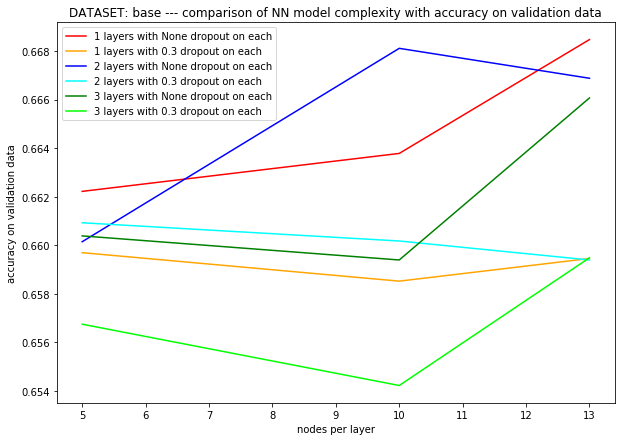

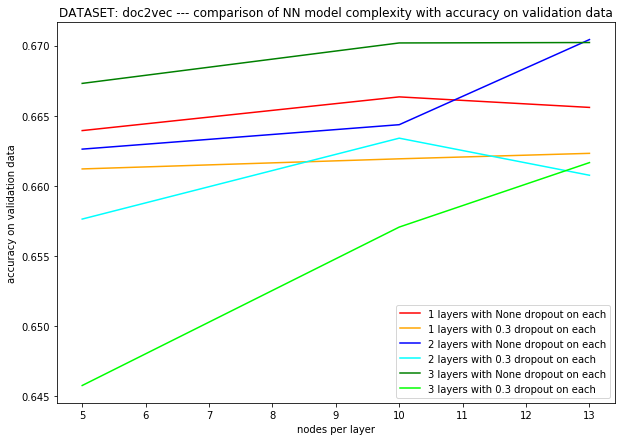

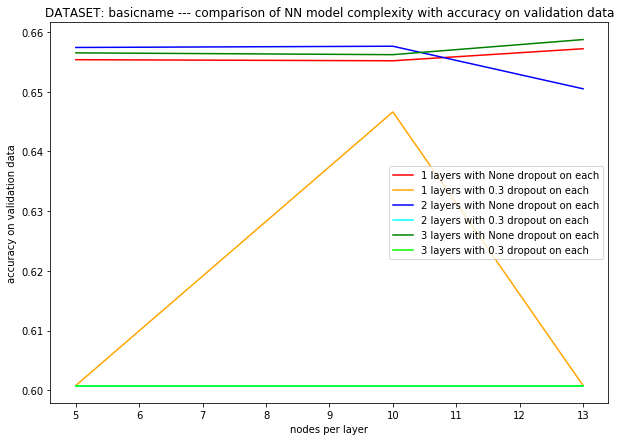

In [18]:
plot_results(base_results, "base", savename="Figures/nn-eval/nn-layerconfig-eval-base.png")
plot_results(doc2vec_results, "doc2vec", savename="Figures/nn-eval/nn-layerconfig-eval-doc2vec.png")
plot_results(basicname_results, "basicname", savename="Figures/nn-eval/nn-layerconfig-eval-basicname.png")

21
0.6704262
21
0.67021567
21
0.67018557
21
0.6684712
21
0.6681103


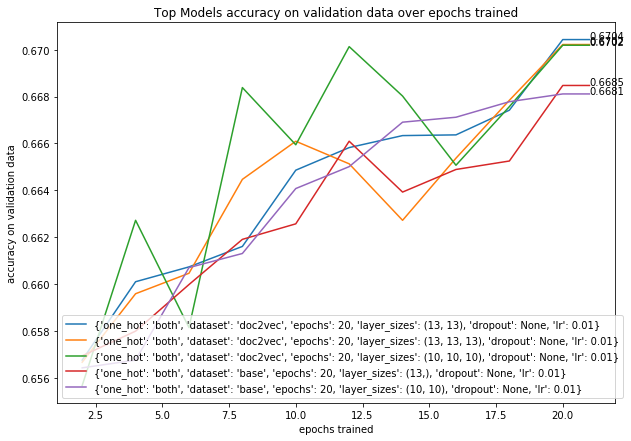

In [45]:
def plot_epochs(top_models, savename=None):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title("Top Models accuracy on validation data over epochs trained")
    ax.set_xlabel("epochs trained")
    ax.set_ylabel("accuracy on validation data")
    
    for model in top_models:
        epoch_data = model[1]["epoch_evaluations"]
        model_config = model[0]
        X = list(epoch_data.keys())
        y = [epoch_data[key] for key in X]
        y = list(map(lambda x: x["accuracy"], y))
        ax.plot(X, y, label="%s" % model_config)
        
        max_epoch = max(epoch_data.keys())
        max_epoch_acc = epoch_data[max_epoch]["accuracy"]
        print(max_epoch)
        print(max_epoch_acc)
        #https://stackoverflow.com/questions/6319155/show-the-final-y-axis-value-of-each-line-with-matplotlib
        ax.annotate(
            "%0.4f" % max_epoch_acc,
            (max_epoch, max_epoch_acc))
#             xytext=(.2, 0))
#             xycoords=('axes fraction', 'data'),
#             textcoords='offset points')
    
    ax.legend()
    
    if savename:
        fig.savefig(savename, dpi=300)
        
plot_epochs(get_best_results(config_results, n=5), savename="Figures/nn-eval/top-models-epochs.png")

In [8]:
one_hot_demonstration=[({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': False},
  {'accuracy': 0.60080004, 'loss': 0.6700640892103356}),
 ({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': 'main'},
  {'accuracy': 0.6338236, 'loss': 0.6389283972193938}),
 ({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.65650094, 'loss': 0.6132693482885189})]

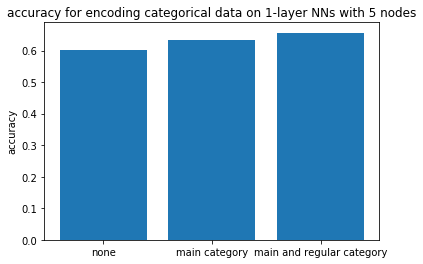

In [22]:
fig, ax = plt.subplots()
ax.set_title("accuracy for encoding categorical data on 1-layer NNs with 5 nodes")
ax.set_ylabel("accuracy")
ax.bar(["none", "main category", "main and regular category"],
       list(map(lambda x: x[1]["accuracy"], one_hot_demonstration)))
fig.savefig("Figures/nn-eval/one-hot.png")